In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# Import data
WHO = pd.read_csv('WHO.csv')
WHO.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [16]:
WHO.isnull()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,False,False,False,False,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,False,False,False,False,False,False,False,False,False,True,False,False,False
190,False,False,False,False,False,False,False,False,False,False,False,True,True
191,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False


Handling missing values: there are few columns have some missing values. Calculating the mean value of the groups in the column resulted from grouping by region, and then fill in the missing value for a country as the mean for the countries from the same region.

In [30]:
# Filling missing values 

def mean_replace(g):
    return g.fillna(g.mean())
# List of columns with missing values
col_list = ['FertilityRate', 'CellularSubscribers', 'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
            'PrimarySchoolEnrollmentFemale']
for col in col_list:
    WHO[col] = WHO.groupby('Region')[col].apply(mean_replace)

In [18]:
WHO.isnull() ## Checking the missing values 

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,False,False,False,False,False,False,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False


Visualization: creating 4 plots of any choice for example histograms, boxplots etc. At least two of the plots should involve data from two separate columns (for example a boxplot of a column grouped by region, or a heatmap depicting the relationship of values in two columns).

/Users/mdmominulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

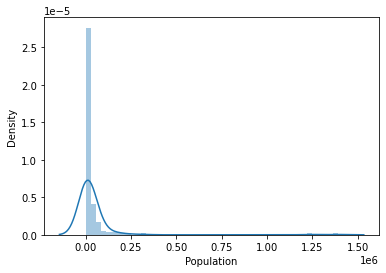

In [19]:
# Creating 4 different plots by any choice.
sns.distplot(WHO.Population)

<AxesSubplot:xlabel='Region', ylabel='ChildMortality'>

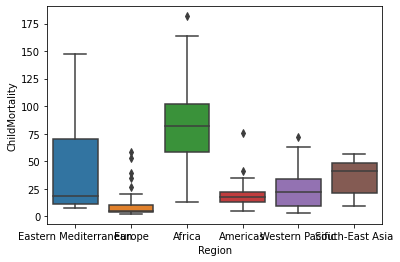

In [20]:
sns.boxplot(x = 'Region', y = 'ChildMortality', data = WHO, orient = 'v')

<AxesSubplot:>

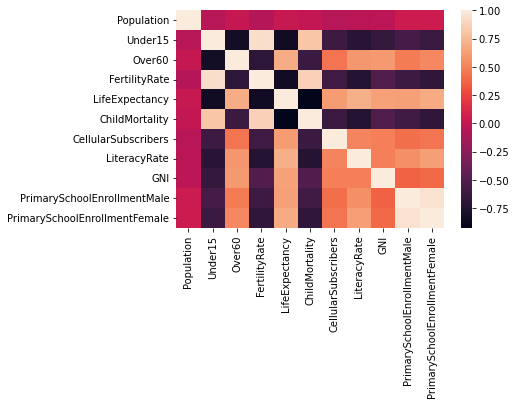

In [21]:
sns.heatmap(WHO.corr())

Data understanding: Focusing on the column GNI, and try to understand what other variables have an impact on/are related to it. (i) some plots on the relationship between GNI and some other variables, (ii) calculating the correlation between GNI and other variables, (iii) discretizing a variable and look at summary statistics of GNI over the resulting groups. The output of this analysis should be a set of three variables that has been identified to be related to GNI.

In [22]:
## Data understanding:
## Trying to understand what other variables have an impact on/are related to column GNI.
## GNI and correlation

WHO.corr()['GNI']

Population                      -0.036713
Under15                         -0.660352
Over60                           0.600572
FertilityRate                   -0.522398
LifeExpectancy                   0.632628
ChildMortality                  -0.520827
CellularSubscribers              0.485501
LiteracyRate                     0.488540
GNI                              1.000000
PrimarySchoolEnrollmentMale      0.368036
PrimarySchoolEnrollmentFemale    0.395113
Name: GNI, dtype: float64

/Users/mdmominulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


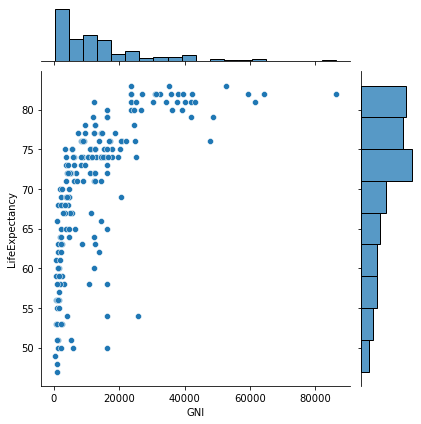

In [23]:
# Some plots
sns.jointplot(WHO.GNI, WHO.LifeExpectancy)

<AxesSubplot:xlabel='Region', ylabel='GNI'>

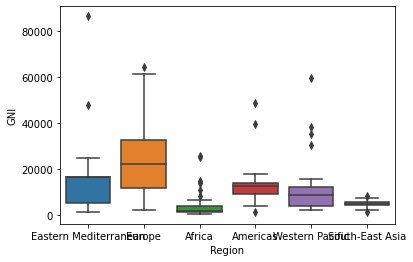

In [24]:
sns.boxplot(x = 'Region', y = 'GNI', data = WHO, orient = 'v')

<AxesSubplot:xlabel='LifeExp_group', ylabel='GNI'>

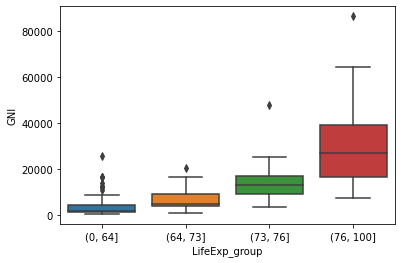

In [25]:
# Discretizing Life Expectancy and comparing GNI
bins = [0, 64, 73, 76, 100]
WHO['LifeExp_group'] = pd.cut(WHO['LifeExpectancy'], bins)
sns.boxplot(x = 'LifeExp_group', y = 'GNI', data = WHO, orient = 'v')

In [26]:
## summary statistics of GNI.

WHO.groupby('LifeExp_group')['GNI'].describe() 

,count,mean,std,min,25%,50%,75%,max
LifeExp_group,,,,,,,,
"(0, 64]",52.0,4228.156822,5526.333866,340.0,1110.0,1730.00,4210.3125,25620.0
"(64, 73]",51.0,6734.914566,4702.909091,950.0,3615.0,4771.25,9190.0000,20560.0
"(73, 76]",43.0,14080.631229,7560.329243,3250.0,9110.0,13000.00,17035.0000,47890.0
"(76, 100]",48.0,30121.278150,16584.200467,7430.0,16270.0,26810.00,39307.5000,86440.0


Visualization: creating three individual plots using tools from the seaborn library (lmplot) that depict the relationship of GNI and the three variables identified in the previous task, and includes a linear regression line. Confirming visually whether it would be meaningful to assume that the relationship between GNI and other variables can be modeled using linear regression.

/Users/mdmominulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


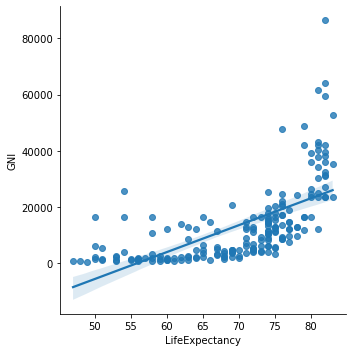

In [27]:
## Visualization:
# 3 chosen variables: LifeExpectancy, Under15, LiteracyRate that depict the relationship of GNI.
sns.lmplot("LifeExpectancy","GNI",WHO)

/Users/mdmominulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


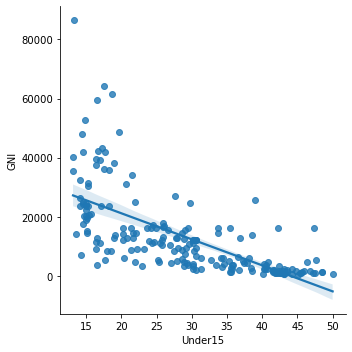

In [28]:
sns.lmplot("Under15","GNI",WHO)

/Users/mdmominulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


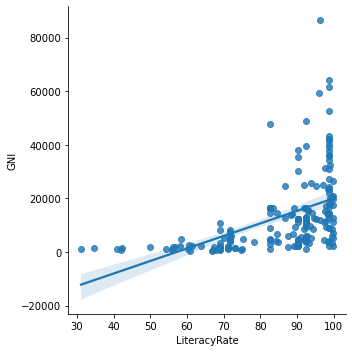

In [29]:
sns.lmplot("LiteracyRate","GNI",WHO)